### Student Information
Name: 蕭靖澂 Ching-Cheng, Hsiao

Student ID: 110033632

GitHub ID: hsiaooo

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

## First: Take home exercises

Please click this **[link](https://github.com/hsiaooo/DM2021-Lab1-master)** to another repo for **First: Take home exercises**!

## Second: New dataset

In [2]:
import csv
import pandas as pd
import numpy as np
import helpers.data_mining_helpers as dmh

In [3]:
# -- read datasets -- #
def file(name):
    
    """
    This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', 
    Kotzias et. al,. KDD 2015
    """
    
    f = open('Datasets/{}'.format(name), 'r')
    
    text = []
    score = []
    dataset = []
    
    while True:
        read = f.readline()  # read the dataset line by line
        
        if not read: 
            break
            
        data = read.split('\t',) 
        data_text = data[0]
        text.append(data_text)
        data_score_ = data[1].split('\n',)
        data_score = data_score_[0]
        score.append(data_score)
        dataset.append(name)
        dataset = [i.split('_',)[0] for i in dataset]
#         print(len(dataset))
#         print(data)
#         print(len(data_text))
#         print(data_score) 

    return text, score, dataset


In [4]:
# -- load each dataset -- #
files = ['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt']
texts = []
scores = []
datasets = []
for file_ in files:
    text, score, dataset = file(file_)
    texts += text
    scores += score
    datasets += dataset

In [5]:
print(len(texts)) 

3000


In [6]:
scores[:10]
print(len(datasets))

3000


In [7]:
# -- creat pandas.DataFrame -- #
data = {'text': texts, 'score': scores, 'dataset': datasets}
df = pd.DataFrame(data)

In [8]:
# -- sample the df -- #
df = df.sample(frac=1).reset_index(drop=True)

In [9]:
# Add a column called dataset_idx, let amazon = 0, yelp = 1, imdb = 2
# def dataset_to_datset_idx(dataset):
#     if dataset == 'amazon':
#         return int(0)
#     elif dataset == 'yelp':
#         return int(1)
#     elif dataset == 'imdb':
#         return int(2)
    
# df['dataset_idx'] = df.dataset.apply(lambda z: dataset_to_datset_idx(z))

In [10]:
# -- Add a column called rate, if score = 1, rate is positive, else rate is negative -- #
def score_to_rate(score):
    if score == '1':
        return 'positive'
    else:
        return 'negative'

df['rate'] = df.score.apply(lambda t: score_to_rate(t))

In [11]:
print(df)

                                                   text score dataset  \
0     Only Pros : Large seating area/ Nice bar area/...     1    yelp   
1     Tried to go here for lunch and it was a madhouse.     0    yelp   
2                    wont work right or atleast for me.     0  amazon   
3     Problem is that the ear loops are made of weak...     0  amazon   
4                                         Doesn't Work.     0  amazon   
...                                                 ...   ...     ...   
2995                             Buttons are too small.     0  amazon   
2996  The meat was pretty dry, I had the sliced bris...     0    yelp   
2997  The sweet potato tots were good but the onion ...     1    yelp   
2998  However, the ear pads come off easily and afte...     0  amazon   
2999                               But I don't like it.     0    yelp   

          rate  
0     positive  
1     negative  
2     negative  
3     negative  
4     negative  
...        ...  
2995

### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [12]:
for _ in data['text'][:3]:
    print(_)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [13]:
df.iloc[::10, 0:2][0:10]

,text,score
0,Only Pros : Large seating area/ Nice bar area/...,1
10,It had some average acting from the main perso...,0
20,"Our server was very nice, and even though he l...",1
30,From here on the Widmark character turns unint...,0
40,disappointed.,0
50,Service was very prompt.,1
60,i would advise to not purchase this item it ne...,0
70,I left with a stomach ache and felt sick the r...,0
80,I used bitpim (a free program you can find on ...,1
90,I kept looking at the time and it had soon bec...,0


### ** >>> Exercise 3 (5 min): **  
Try to fecth records belonging to the ```comp.graphics``` category, and query every 10th record. Only show the first 5 records.

In [14]:
df_yelp = df['dataset']=='yelp'
df_= df.loc[df_yelp]
df_[::10][0:5]

,text,score,dataset,rate
0,Only Pros : Large seating area/ Nice bar area/...,1,yelp,positive
21,Con: spotty service.,0,yelp,negative
52,If you haven't gone here GO NOW!,1,yelp,positive
87,"It's like a really sexy party in your mouth, w...",1,yelp,positive
106,The service was terrible though.,0,yelp,negative


In [15]:
df.loc[::10, 'text'][0:10]

0     Only Pros : Large seating area/ Nice bar area/...
10    It had some average acting from the main perso...
20    Our server was very nice, and even though he l...
30    From here on the Widmark character turns unint...
40                                        disappointed.
50                             Service was very prompt.
60    i would advise to not purchase this item it ne...
70    I left with a stomach ache and felt sick the r...
80    I used bitpim (a free program you can find on ...
90    I kept looking at the time and it had soon bec...
Name: text, dtype: object

In [16]:
df.isnull()

,text,score,dataset,rate
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2995,False,False,False,False
2996,False,False,False,False
2997,False,False,False,False
2998,False,False,False,False


### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [17]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,dataset,rate
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [18]:
df.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [19]:
dummy_series = pd.Series(["dummy_record", "1"], index=["text", "score"])

In [20]:
dummy_series

text     dummy_record
score               1
dtype: object

In [21]:
result_with_series = df.append(dummy_series, ignore_index=True)

In [22]:
result_with_series

,text,score,dataset,rate
0,Only Pros : Large seating area/ Nice bar area/...,1,yelp,positive
1,Tried to go here for lunch and it was a madhouse.,0,yelp,negative
2,wont work right or atleast for me.,0,amazon,negative
3,Problem is that the ear loops are made of weak...,0,amazon,negative
4,Doesn't Work.,0,amazon,negative
...,...,...,...,...
2996,"The meat was pretty dry, I had the sliced bris...",0,yelp,negative
2997,The sweet potato tots were good but the onion ...,1,yelp,positive
2998,"However, the ear pads come off easily and afte...",0,amazon,negative
2999,But I don't like it.,0,yelp,negative


In [23]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,dataset,rate
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1,1


In [24]:
dummy_dict=[{'text':'dummy_record', 'score':'1'}]

In [25]:
df = df.append(dummy_dict, ignore_index=True)

In [26]:
len(df)

3001

In [27]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,dataset,rate
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1,1


In [28]:
df.dropna(inplace=True)

In [29]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,dataset,rate
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [30]:
len(df)

3000

In [31]:
sum(df.duplicated('text'))

17

In [32]:
df.duplicated('text')

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [33]:
df.drop_duplicates(keep=False, inplace=True)

In [34]:
df.shape

(2966, 4)

## 5.  Data Preprocessing
In the Data Mining course we learned about the many ways of performing data preprocessing. In reality, the list is quiet general as the specifics of what data preprocessing involves is too much to cover in one course. This is especially true when you are dealing with unstructured data, as we are dealing with in this particular notebook. But let us look at some examples for each data preprocessing technique that we learned in the class. We will cover each item one by one, and provide example code for each category. You will learn how to peform each of the operations, using Pandas, that cover the essentials to Preprocessing in Data Mining. We are not going to follow any strict order, but the items we will cover in the preprocessing section of this notebook are as follows:

- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

### 5.1 Sampling
The first concept that we are going to cover from the above list is sampling. Sampling refers to the technique used for selecting data. The functionalities that we use to  selected data through queries provided by Pandas are actually basic methods for sampling. The reasons for sampling are sometimes due to the size of data -- we want a smaller subset of the data that is still representatitive enough as compared to the original dataset. 

We don't have a problem of size in our current dataset since it is just a couple thousand records long. But if we pay attention to how much content is included in the `text` field of each of those records, you will realize that sampling may not be a bad idea after all. In fact, we have already done some sampling by just reducing the records we are using here in this notebook; remember that we are only using four categories from the all the 20 categories available. Let us get an idea on how to sample using pandas operations.

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [35]:
df_sample = df.sample(n=1000)

In [36]:
df_sample[0:4]

,text,score,dataset,rate
1130,the phone was unusable and was not new.,0,amazon,negative
2349,Unfortunately it's easy to accidentally activa...,0,amazon,negative
1961,Best headset ever!!!.,1,amazon,positive
2759,I dont think I will be back for a very long time.,0,yelp,negative


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

negative    1486
positive    1480
Name: rate, dtype: int64


<AxesSubplot:title={'center':'Rate distribution'}>

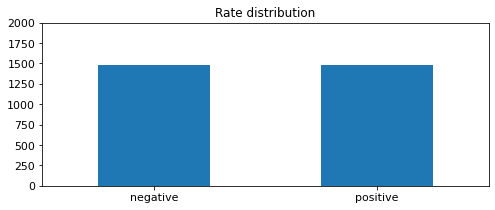

In [38]:
print(df.rate.value_counts())
df.rate.value_counts().plot(kind = 'bar',
                                title = 'Rate distribution',
                                ylim = [0, 2000],
                                rot = 0, fontsize = 11, figsize = (8,3))

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

positive    522
negative    478
Name: rate, dtype: int64


<AxesSubplot:title={'center':'Sample data distribution'}>

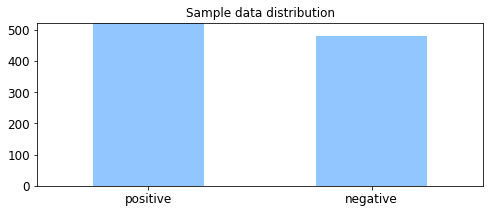

In [39]:
print(df_sample.rate.value_counts())

# plot barchart for df_sample
plt.style.use('seaborn-pastel')
# set the max value of df_sample
df_sample_max = df_sample.rate.value_counts().max()
# set ylim is df_sample_max
df_sample.rate.value_counts().plot(kind = 'bar',
                                       title = 'Sample data distribution',
                                       ylim = [0, df_sample_max ],
                                       rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

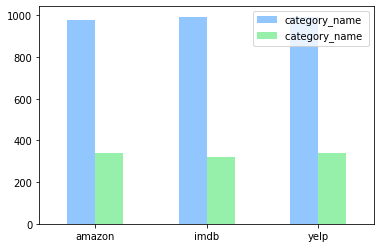

In [40]:
index = ['amazon', 'imdb', 'yelp']

compare_data = pd.DataFrame({'category_name': df.dataset.value_counts(),
                             'category_name ': df_sample.dataset.value_counts()
                            },index=index)
ax = compare_data.plot.bar(rot=0)

### 5.2 Feature Creation
The other operation from the list above that we are going to practise on is the so-called feature creation. As the name suggests, in feature creation we are looking at creating new interesting and useful features from the original dataset; a feature which captures the most important information from the raw information we already have access to. In our `X` table, we would like to create some features from the `text` field, but we are still not sure what kind of features we want to create. We can think of an interesting problem we want to solve, or something we want to analyze from the data, or some questions we want to answer. This is one process to come up with features -- this process is usually called `feature engineering` in the data science community. 

We know what feature creation is so let us get real involved with our dataset and make it more interesting by adding some special features or attributes if you will. First, we are going to obtain the **unigrams** for each text. (Unigram is just a fancy word we use in Text Mining which stands for 'tokens' or 'individual words'.) Yes, we want to extract all the words found in each text and append it as a new feature to the pandas dataframe. The reason for extracting unigrams is not so clear yet, but we can start to think of obtaining some statistics about the articles we have: something like **word distribution** or **word frequency**.

Before going into any further coding, we will also introduce a useful text mining library called [NLTK](http://www.nltk.org/). The NLTK library is a natural language processing tool used for text mining tasks, so might as well we start to familiarize ourselves with it from now (It may come in handy for the final project!). In partcular, we are going to use the NLTK library to conduct tokenization because we are interested in splitting a sentence into its individual components, which we refer to as words, emojis, emails, etc. So let us go for it! We can call the `nltk` library as follows:

```python
import nltk
```

In [41]:
import nltk

In [42]:
df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))

In [43]:
df[0:4]['unigrams']

0    [Only, Pros, :, Large, seating, area/, Nice, b...
1    [Tried, to, go, here, for, lunch, and, it, was...
2         [wont, work, right, or, atleast, for, me, .]
3    [Problem, is, that, the, ear, loops, are, made...
Name: unigrams, dtype: object

In [44]:
df[0:4]

,text,score,dataset,rate,unigrams
0,Only Pros : Large seating area/ Nice bar area/...,1,yelp,positive,"[Only, Pros, :, Large, seating, area/, Nice, b..."
1,Tried to go here for lunch and it was a madhouse.,0,yelp,negative,"[Tried, to, go, here, for, lunch, and, it, was..."
2,wont work right or atleast for me.,0,amazon,negative,"[wont, work, right, or, atleast, for, me, .]"
3,Problem is that the ear loops are made of weak...,0,amazon,negative,"[Problem, is, that, the, ear, loops, are, made..."


In [45]:
list(df[0:1]['unigrams'])

[['Only',
  'Pros',
  ':',
  'Large',
  'seating',
  'area/',
  'Nice',
  'bar',
  'area/',
  'Great',
  'simple',
  'drink',
  'menu/',
  'The',
  'BEST',
  'brick',
  'oven',
  'pizza',
  'with',
  'homemade',
  'dough',
  '!']]

### 5.3 Feature subset selection
Okay, so we are making some headway here. Let us now make things a bit more interesting. We are going to do something different from what we have been doing thus far. We are going use a bit of everything that we have learned so far. Briefly speaking, we are going to move away from our main dataset (one form of feature subset selection), and we are going to generate a document-term matrix from the original dataset. In other words we are going to be creating something like this. 

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vS01RrtPHS3r1Lf8UjX4POgDol-lVF4JAbjXM3SAOU-dOe-MqUdaEMWwJEPk9TtiUvcoSqTeE--lNep/pub?w=748&h=366)

Initially, it won't have the same shape as the table above, but we will get into that later. For now, let us use scikit learn built in functionalities to generate this document. You will see for yourself how easy it is to generate this table without much coding. 

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text)

In [47]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [48]:
print(df['text'][0])
analyze(df['text'][0])

Only Pros : Large seating area/ Nice bar area/ Great simple drink menu/ The BEST brick oven pizza with homemade dough!


['only',
 'pros',
 'large',
 'seating',
 'area',
 'nice',
 'bar',
 'area',
 'great',
 'simple',
 'drink',
 'menu',
 'the',
 'best',
 'brick',
 'oven',
 'pizza',
 'with',
 'homemade',
 'dough']

In [49]:
df_counts.shape

(2966, 5153)

In [50]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [51]:
df[0:5]

,text,score,dataset,rate,unigrams
0,Only Pros : Large seating area/ Nice bar area/...,1,yelp,positive,"[Only, Pros, :, Large, seating, area/, Nice, b..."
1,Tried to go here for lunch and it was a madhouse.,0,yelp,negative,"[Tried, to, go, here, for, lunch, and, it, was..."
2,wont work right or atleast for me.,0,amazon,negative,"[wont, work, right, or, atleast, for, me, .]"
3,Problem is that the ear loops are made of weak...,0,amazon,negative,"[Problem, is, that, the, ear, loops, are, made..."
4,Doesn't Work.,0,amazon,negative,"[Does, n't, Work, .]"


In [52]:
# we convert from sparse array to normal array
df_counts[0:5][:].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [53]:
# define the xyz
plot_x = ['term_' + str(i) for i in count_vect.get_feature_names_out()[0:50]]
plot_y = ['doc_' + str(i) for i in list(df.index)[0:50]]
plot_z = df_counts[25:75, 25:75].toarray()  # Because 0:50 didn't find 1, I change to 25:75

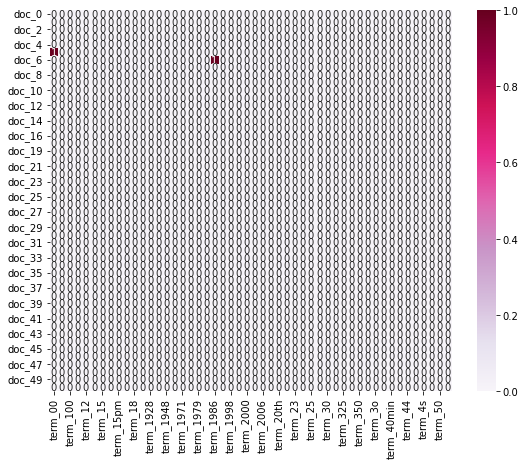

In [54]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 5.4 Dimensionality Reduction
Since we have just touched on the concept of sparsity most naturally the problem of "curse of dimentionality" comes up. I am not going to get into the full details of what dimensionality reduction is and what it is good for just the fact that is an excellent technique for visualizing data efficiently (please refer to notes for more information). All I can say is that we are going to deal with the issue of sparsity with a few lines of code. And we are going to try to visualize our data more efficiently with the results.

We are going to make use of Principal Component Analysis to efficeintly reduce the dimensions of our data, with the main goal of "finding a projection that captures the largest amount of variation in the data." This concept is important as it is very useful for visualizing and observing the characteristics of our dataset. 

In [55]:
from sklearn.decomposition import PCA

df_DimRe = PCA(n_components = 2).fit_transform(df_counts.toarray())

df_DimRe.shape

(2966, 2)

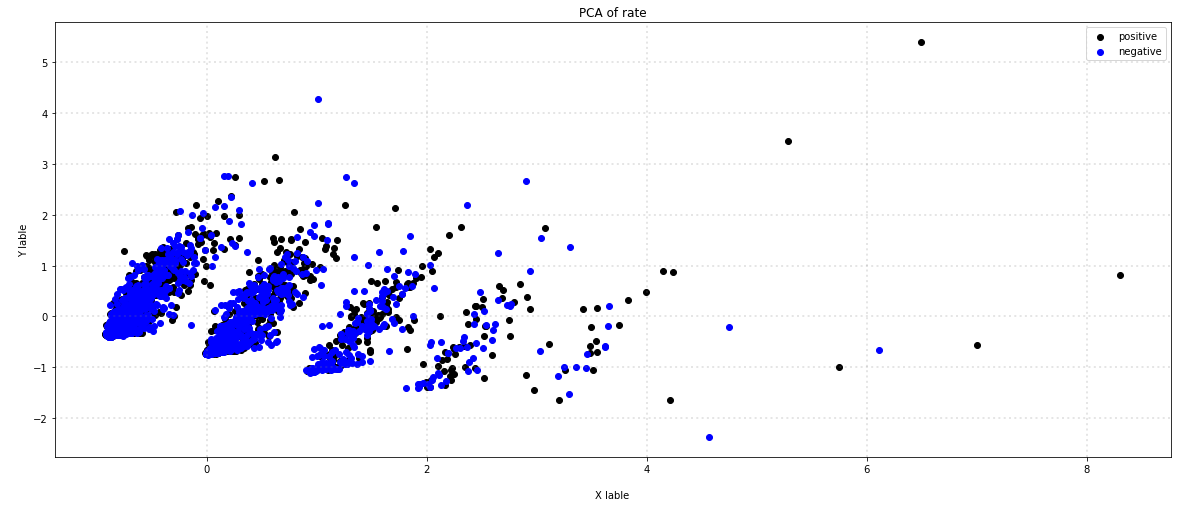

In [56]:
# colorful of points
col = ['black', 'blue']

# plot
fig = plt.figure(figsize = (20,8))
ax = fig.subplots()

for c, rate in zip(col, ['positive', 'negative']):
    xs = df_DimRe[df['rate'] == rate].T[0]
    ys = df_DimRe[df['rate'] == rate].T[1]
    
    ax.scatter(xs, ys, c = c, marker = 'o', label = rate)
    
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX lable')
ax.set_ylabel('\nY lable')
ax.set_title('PCA of rate')
ax.legend()
plt.show()

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

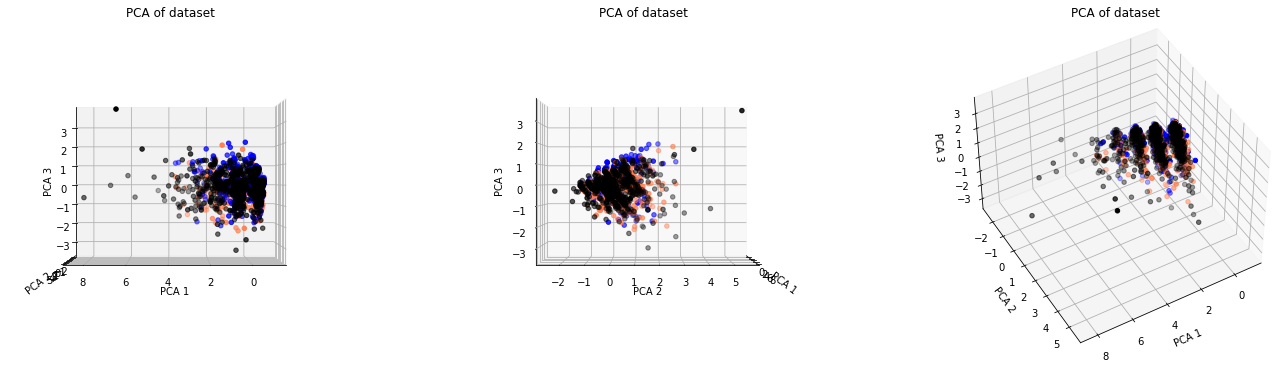

In [57]:
# for 3d
df_DimRe3 = PCA(n_components=3).fit_transform(df_counts.toarray())

# print(df_DimRe3.shape)

col = ['coral', 'blue', 'black']

# plot for Datasets
fig = plt.figure(figsize=(24,6))
ax = fig.add_subplot(1, 3, 1, projection = '3d')

for c, dataset in zip(col, ['amazon', 'yelp', 'imdb']):
    xs = df_DimRe3[df['dataset'] == dataset].T[0]
    ys = df_DimRe3[df['dataset'] == dataset].T[1]
    zs = df_DimRe3[df['dataset'] == dataset].T[2]
    ax.scatter(xs, ys, zs, c = c, marker = 'o')
    
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('PCA of dataset')
ax.view_init(0, 90)

ax = fig.add_subplot(1, 3, 2, projection= '3d')

for c, dataset in zip(col, ['amazon', 'yelp', 'imdb']):
    xs = df_DimRe3[df['dataset'] == dataset].T[0]
    ys = df_DimRe3[df['dataset'] == dataset].T[1]
    zs = df_DimRe3[df['dataset'] == dataset].T[2]
    ax.scatter(xs, ys, zs, c = c, marker = 'o')
    
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('PCA of dataset')
ax.view_init(0, 0)

ax = fig.add_subplot(1, 3, 3, projection= '3d')

for c, dataset in zip(col, ['amazon', 'yelp', 'imdb']):
    xs = df_DimRe3[df['dataset'] == dataset].T[0]
    ys = df_DimRe3[df['dataset'] == dataset].T[1]
    zs = df_DimRe3[df['dataset'] == dataset].T[2]
    ax.scatter(xs, ys, zs, c = c, marker = 'o')
    
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('PCA of dataset')
ax.view_init(45, 60)

### 5.5 Atrribute Transformation / Aggregation
We can do other things with the term-vector matrix besides applying dimensionalaity reduction technique to deal with sparsity problem. Here we are going to generate a simple distribution of the words found in all the entire set of articles. Intuitively, this may not make any sense, but in data science sometimes we take some things for granted, and we just have to explore the data first before making any premature conclusions. On the topic of attribute transformation, we will take the word distribution and put the distribution in a scale that makes it easy to analyze patterns in the distrubution of words. Let us get into it!

In [58]:
term_frequencies = []

for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))
    
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

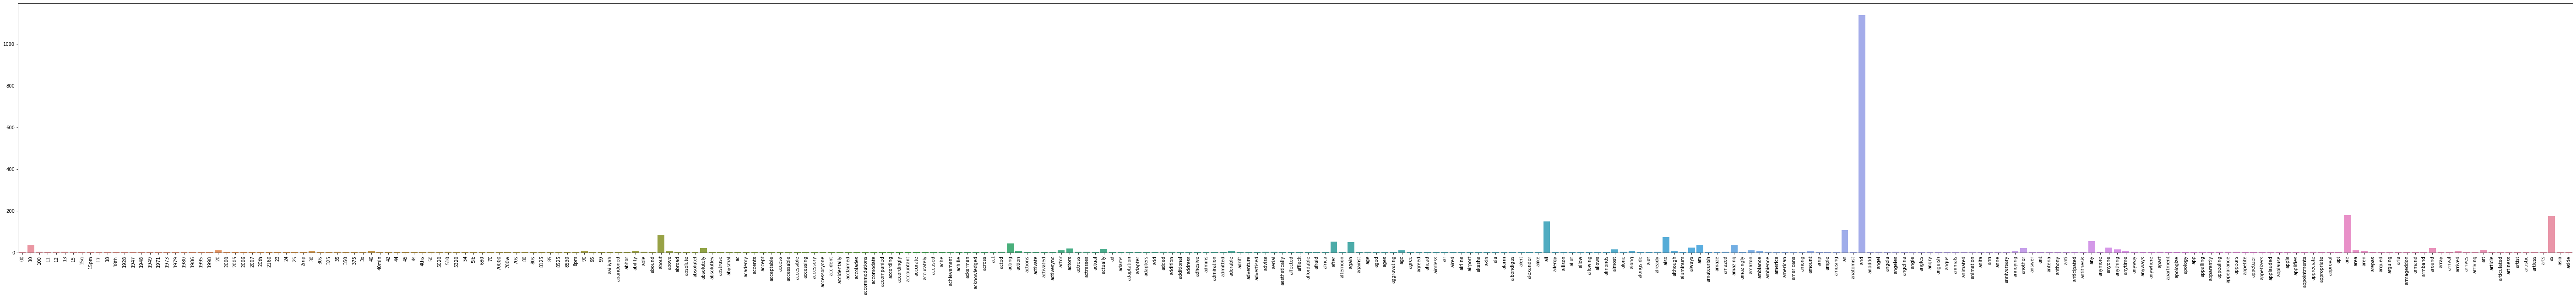

In [59]:
plt.subplots(figsize=(100, 10))

g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])

g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

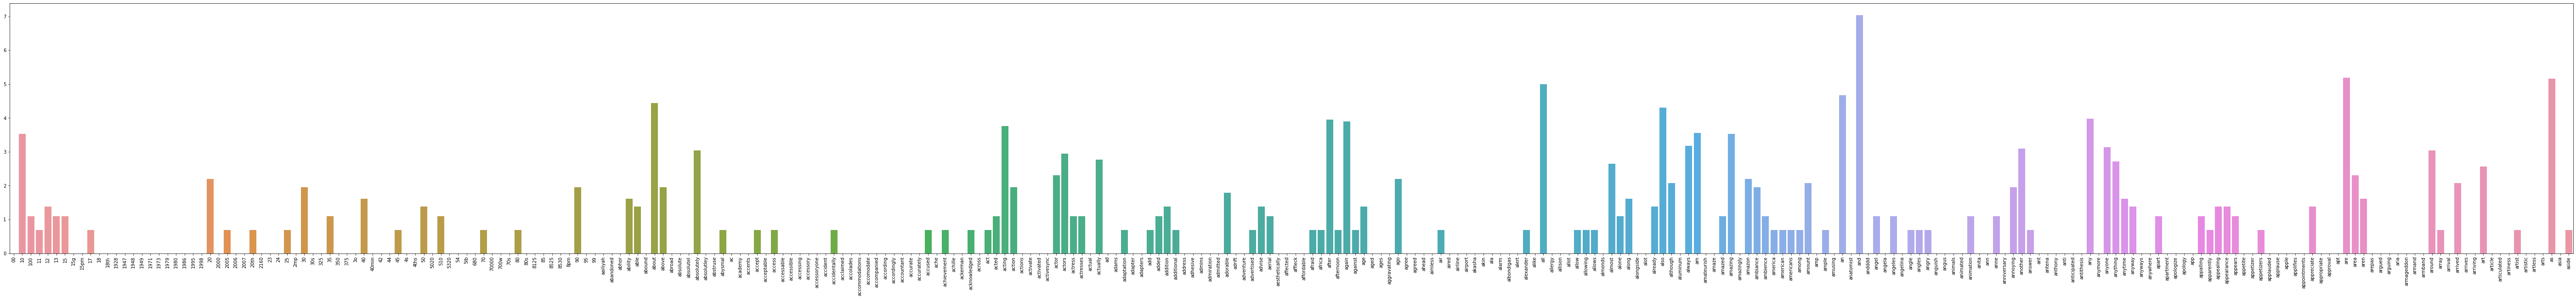

In [60]:
import math

term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `category_name`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. Let us take a look at what we want to achieve in code. 

In [61]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [62]:
mlb = preprocessing.LabelBinarizer()

mlb.fit(df.dataset)

mlb.classes_

array(['amazon', 'imdb', 'yelp'], dtype='<U6')

In [63]:
# -- labelbinarization for dataset -- #
df['bin_dataset'] = mlb.transform(df['dataset']).tolist()

df

,text,score,dataset,rate,unigrams,bin_dataset
0,Only Pros : Large seating area/ Nice bar area/...,1,yelp,positive,"[Only, Pros, :, Large, seating, area/, Nice, b...","[0, 0, 1]"
1,Tried to go here for lunch and it was a madhouse.,0,yelp,negative,"[Tried, to, go, here, for, lunch, and, it, was...","[0, 0, 1]"
2,wont work right or atleast for me.,0,amazon,negative,"[wont, work, right, or, atleast, for, me, .]","[1, 0, 0]"
3,Problem is that the ear loops are made of weak...,0,amazon,negative,"[Problem, is, that, the, ear, loops, are, made...","[1, 0, 0]"
4,Doesn't Work.,0,amazon,negative,"[Does, n't, Work, .]","[1, 0, 0]"
...,...,...,...,...,...,...
2995,Buttons are too small.,0,amazon,negative,"[Buttons, are, too, small, .]","[1, 0, 0]"
2996,"The meat was pretty dry, I had the sliced bris...",0,yelp,negative,"[The, meat, was, pretty, dry, ,, I, had, the, ...","[0, 0, 1]"
2997,The sweet potato tots were good but the onion ...,1,yelp,positive,"[The, sweet, potato, tots, were, good, but, th...","[0, 0, 1]"
2998,"However, the ear pads come off easily and afte...",0,amazon,negative,"[However, ,, the, ear, pads, come, off, easily...","[1, 0, 0]"


In [64]:
mlb.fit(df.rate)
mlb.classes_

array(['negative', 'positive'], dtype='<U8')

In [65]:
# -- labelbinarization for rate -- #
df['bin_rate'] = mlb.transform(df['rate']).tolist()

df

,text,score,dataset,rate,unigrams,bin_dataset,bin_rate
0,Only Pros : Large seating area/ Nice bar area/...,1,yelp,positive,"[Only, Pros, :, Large, seating, area/, Nice, b...","[0, 0, 1]",[1]
1,Tried to go here for lunch and it was a madhouse.,0,yelp,negative,"[Tried, to, go, here, for, lunch, and, it, was...","[0, 0, 1]",[0]
2,wont work right or atleast for me.,0,amazon,negative,"[wont, work, right, or, atleast, for, me, .]","[1, 0, 0]",[0]
3,Problem is that the ear loops are made of weak...,0,amazon,negative,"[Problem, is, that, the, ear, loops, are, made...","[1, 0, 0]",[0]
4,Doesn't Work.,0,amazon,negative,"[Does, n't, Work, .]","[1, 0, 0]",[0]
...,...,...,...,...,...,...,...
2995,Buttons are too small.,0,amazon,negative,"[Buttons, are, too, small, .]","[1, 0, 0]",[0]
2996,"The meat was pretty dry, I had the sliced bris...",0,yelp,negative,"[The, meat, was, pretty, dry, ,, I, had, the, ...","[0, 0, 1]",[0]
2997,The sweet potato tots were good but the onion ...,1,yelp,positive,"[The, sweet, potato, tots, were, good, but, th...","[0, 0, 1]",[1]
2998,"However, the ear pads come off easily and afte...",0,amazon,negative,"[However, ,, the, ear, pads, come, off, easily...","[1, 0, 0]",[0]


# 6. Data Exploration

Sometimes you need to take a peek at your data to understand the relationships in your dataset. Here, we will focus in a similarity example. Let's take 3 documents and compare them.

In [66]:
# -- Pick three rows, to see the text of them -- #

document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1, '\n', document_to_transform_2, '\n', document_to_transform_3)

['We are sending it back.'] 
 ['We waited for thirty minutes to be seated (although there were 8 vacant tables and we were the only folks waiting).'] 
 ['However, BT headsets are currently not good for real time games like first-person shooters since the audio delay messes me up.']


In [67]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [68]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.182574
Cosine Similarity using count bw 1 and 3: 0.095346
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


## Third: New data visualization, TF-IDF, Naive Bayes classifier

Visualize the top 50 terms in the dataset. In original methods, we can view the dataset visualization, but this method can help us observe the top frequence in the dataset. It more useful to find the relationship between the data.

In [69]:
# -- created a set of term frequence -- #
term_freq = {}

for term, freq in zip(count_vect.get_feature_names_out(), term_frequencies):
    term_freq[term] = freq

# -- sorted term_freq -- #
sorted_term_freq = sorted(term_freq.items(), key = lambda x:x[1], reverse=True)

In [70]:
top50_term = [sorted_term_freq[i][0] for i in range(50)]

top50_freq = [sorted_term_freq[i][1] for i in range(50)]

print('top50_term:\n', top50_term, '\ntop50_freq:\n', top50_freq)

top50_term:
 ['the', 'and', 'it', 'is', 'to', 'this', 'of', 'was', 'in', 'for', 'that', 'not', 'with', 'my', 'very', 'good', 'on', 'you', 'but', 'great', 'have', 'movie', 'are', 'as', 'so', 'film', 'phone', 'all', 'be', 'one', 'had', 'at', 'food', 'like', 'just', 'there', 'time', 'place', 'service', 'an', 'they', 'we', 'were', 'bad', 'from', 'really', 'if', 'well', 'out', 'has'] 
top50_freq:
 [1949, 1138, 789, 750, 668, 633, 624, 569, 400, 332, 316, 300, 274, 254, 245, 230, 221, 218, 201, 198, 184, 182, 180, 175, 171, 163, 160, 148, 148, 146, 138, 135, 124, 123, 119, 112, 112, 110, 108, 106, 106, 105, 105, 103, 103, 103, 102, 92, 88, 87]


Text(0.5, 1.0, 'Top 50 terms in the dataset')

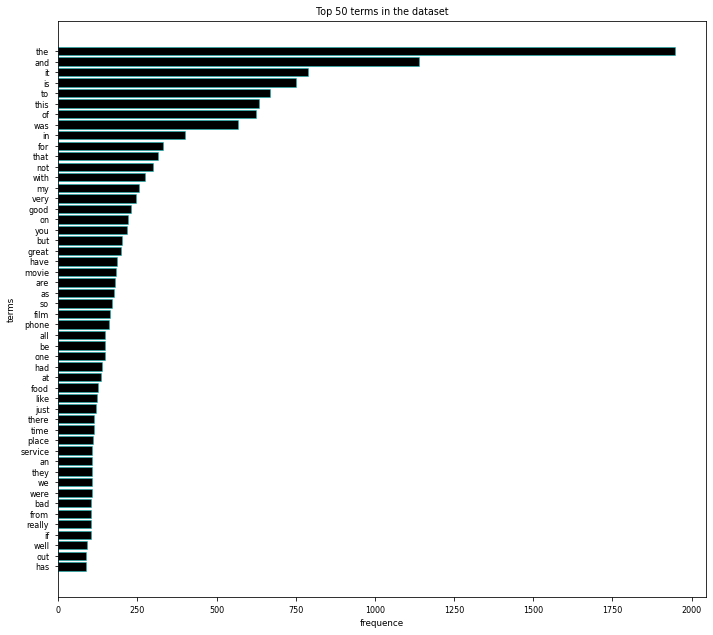

In [71]:
# -- plot -- #
fig = plt.figure()
plt.style.use('seaborn-paper')
ax = fig.add_axes([0, 0, 1.5, 2])

ax.barh(list(reversed(top50_term)), list(reversed(top50_freq)), ls = '-', linewidth=0.5, ec = 'c', color = 'black')
ax.set_xlabel('frequence')
ax.set_ylabel('terms')
ax.set_title('Top 50 terms in the dataset')
# for xi, yi in zip(list(reversed(top50_term)), list(reversed(top50_freq))):
#     ax.text(float(xi)+0.5, float(yi)+0.5, '%.0f'%yi, ha ='center', va = 'bottom', fontsize=7)

In result, we can see 'the' has the largest frequence, 'and' has the second largest.

***TF-IDF***

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()

In [73]:
matrix_vect = tfidf_vect.fit_transform(df.text)

df_tfidf = pd.DataFrame(matrix_vect.toarray(), columns = tfidf_vect.get_feature_names_out())

df_tfidf.head()

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
total_tfidf_val = []

for col in df_tfidf.columns:
    total_tfidf_val.append(df_tfidf[col].sum())

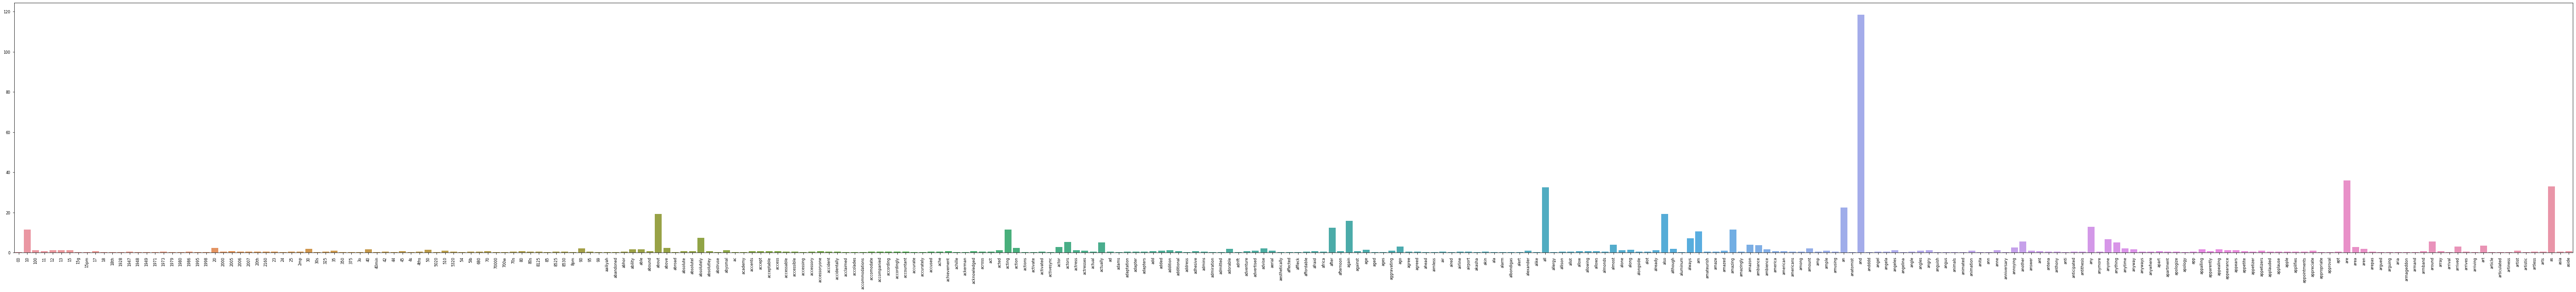

In [75]:
# -- plot -- #
plt.subplots(figsize=(100, 10))

tfidf_plt = sns.barplot(x=tfidf_vect.get_feature_names_out()[:300], 
            y=total_tfidf_val[:300])

tfidf_plt.set_xticklabels(tfidf_vect.get_feature_names_out()[:300], rotation = 90);

***Naive Bayes classifier***

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from time import time

# defin the x, y frequency
df_X_term_freq = pd.DataFrame(df_counts.toarray(), columns=count_vect.get_feature_names_out())
df_y_term_freq = pd.DataFrame(df['score'], columns=['score'])

df_X_term_freq.head()

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df_y_term_freq.head()

,score
0,1
1,0
2,0
3,0
4,0


In [78]:
X_term_freq = df_X_term_freq.iloc[:,:].values
y_term_freq = df_y_term_freq.iloc[:,:].values.ravel()


X_term_freq_train, X_term_freq_test, y_term_freq_train, y_term_freq_test = train_test_split(X_term_freq, 
                                                                                            y_term_freq, 
                                                                                            test_size=0.25)

t = time()

# build naive bayes classification model
mbc = MultinomialNB()
mbc.fit(X_term_freq_train,y_term_freq_train)

training_time = time() - t

y_term_freq_pred = mbc.predict(X_term_freq_test)

In [82]:
from sklearn.metrics import accuracy_score

print("train time: %0.3fs" % training_time)

print("Accuracy of term-frequency: %.5f" % accuracy_score(y_term_freq_test,y_term_freq_pred))

train time: 0.021s
Accuracy of term-frequency: 0.82615


Let test use tfidf with Naive bayes classifier.

In [81]:
# -- Tf-IDF -- #
df_X_tfidf = pd.DataFrame(matrix_vect.toarray(), columns=tfidf_vect.get_feature_names_out())
df_y_tfidf = pd.DataFrame(df['score'], columns=['score'])

X_tfidf = df_X_tfidf.iloc[:,:].values
y_tfidf = df_y_tfidf.iloc[:,:].values.ravel()

X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(X_tfidf,
                                                                            y_tfidf,
                                                                            test_size=0.25)
t_ = time()

tfidf_mbc = MultinomialNB()
tfidf_mbc.fit(X_tfidf_train,y_tfidf_train)

training_time = time() - t_

y_tfidf_pred = tfidf_mbc.predict(X_tfidf_test)

print("train time: %0.3fs" % training_time)
print("Accuracy of tfidf: %.5f" %accuracy_score(y_tfidf_test,y_tfidf_pred))

train time: 0.021s
Accuracy of tfidf: 0.82749


***Comment on the difference between two classifiers:***

In this part, term frequency inverse document frequency is a method of assigning numeric values to features. It is independent of the method use to classify the data points. 

After experiment, we got the accuracy between these two methods (term-frequence, tfidf). And use the term-frequence got 0.84367, tfidf got 0.83693. Furthermore, the term-frequence is a word's number of occurences devided by the number of words in a document, but in a document has some specific word appers more often. So, the tfidf feature maybe suitabke for naive bayes classifier.

## Fourth

1. After doing HW, I think seaborn is not quite efficient. Since there are too much zero in document matrix and so many terms that heatmap can't print all. It will make us miss some information in this data. Maybe it can use the top 50 frequencies to show more relationships in document.


2. In original data, we created the column 'catogory_name'. I think this is not quite efficient. Since we already have catogary column to describe it. Maybe we can use one-hot-encoding to clearly present it.


3. In order to improve the data preprocessing for specific datasets, we must need to know more about knowledge of different dataset and consider more about what kind of preprocesssing will make the predict result better. In Lab1, after generating document matrix, we found a lot of zero in it. If we want to improve the classifier, maybe we can remove the noises. And drawing the plot is also a useful way for us to know more information in data.